In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
# Notes:
# globaal idee van wat voor soort experimenten we doen
# ?Beschrijven van algemeenheden van experimenten
# Fine-tuning base10 - different configs & hours - WER
# -Different values for lm-weight blabla
# Fine-tuning xlsr - difference with base10 - WER
# Shifting subtitles - difference without shifting - xlsr + base10 - WER
# Other stuff
# -Use of interpunction
# -Eh cases
# -Summarizing information
# -Equal LM model for asr + my model

In [4]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

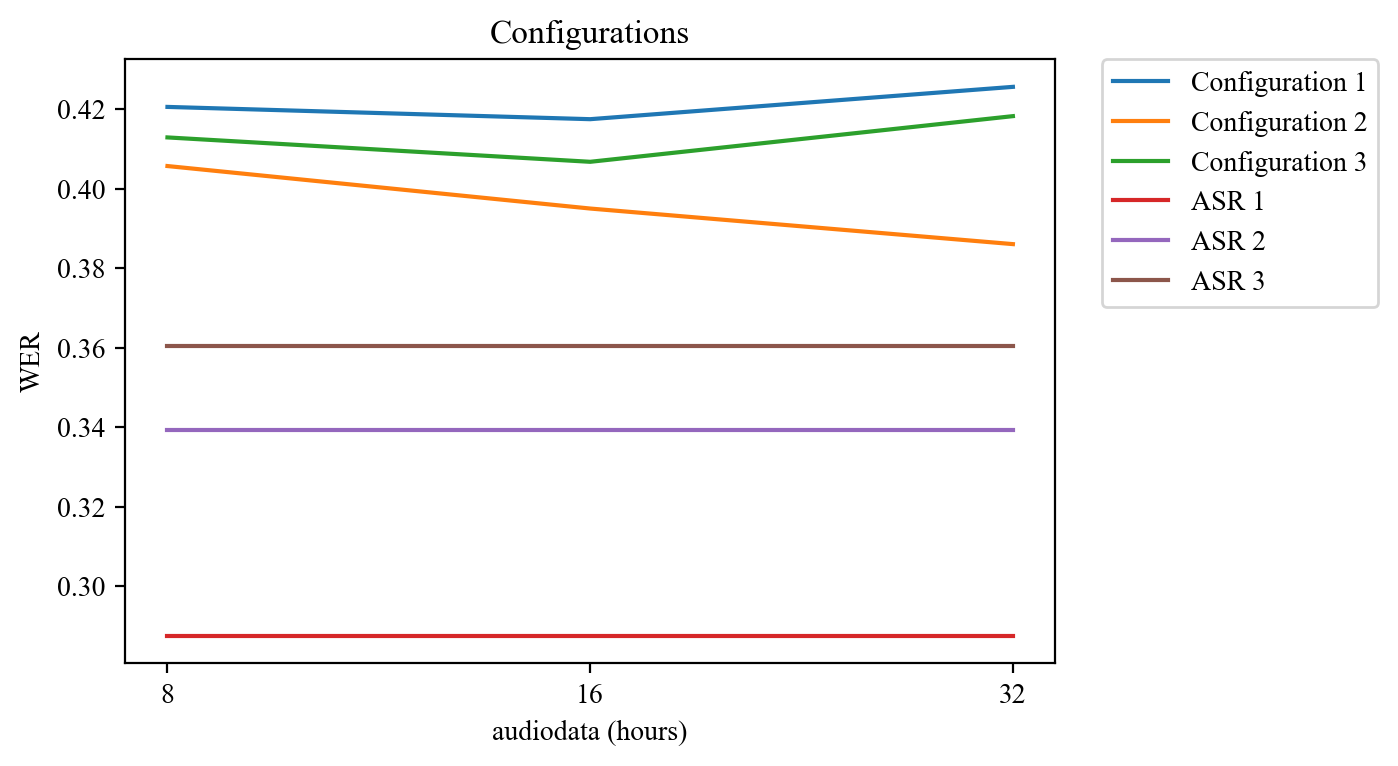

In [5]:
# Fine-tuning base10 - different configs & hours - WER

# config1: [2021-11-11/18-12-54, 2021-11-12/10-12-27, 2021-11-12/10-34-58]
# config2: [2021-11-14/15-14-42, 2021-11-14/15-23-43, 2021-11-14/15-30-40]
# config3: [2021-11-15/11-44-06, 2021-11-15/11-45-07, 2021-11-15/13-23-43]

# testset: 'test'
# normal
data = {
        'Configuration 1': [0.4205669671663695, 0.41747871716981055, 0.42561384172120553], #0:50:32.936000
        'Configuration 2': [0.4056876739594236, 0.3949950689869304, 0.3860400177398728], #1:06:01.672000
        'Configuration 3': [0.4128892392107573, 0.4067541928500564, 0.41824517531907135], #1:00:00.798000
        'ASR 1': [0.2874460738421658, 0.2874460738421658, 0.2874460738421658],
        'ASR 2': [0.33927041341867675, 0.33927041341867675, 0.33927041341867675],
        'ASR 3': [0.36049485629530365, 0.36049485629530365, 0.36049485629530365]
       }

# testset: 'test'
# weird: model config1 tested on config2 testset
data2 = {
        'Configuration 1': [0.48873507856770765, 0.47082425935335026, 0.4809520257377578],
        'Configuration 2': [0.4056876739594236, 0.3949950689869304, 0.3860400177398728],
        'Configuration 3': [0.4128892392107573, 0.4067541928500564, 0.41824517531907135],
        'ASR 1': [0.33927041341867675, 0.33927041341867675, 0.33927041341867675],
        'ASR 2': [0.33927041341867675, 0.33927041341867675, 0.33927041341867675],
        'ASR 3': [0.36049485629530365, 0.36049485629530365, 0.36049485629530365]
       }

fig, ax = plt.subplots()
for key in data:
    ax.plot(data[key], label=key)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Configurations')
plt.xlabel('audiodata (hours)')
plt.ylabel('WER')
plt.xticks(list(range(3)), [8, 16, 32])
plt.show()

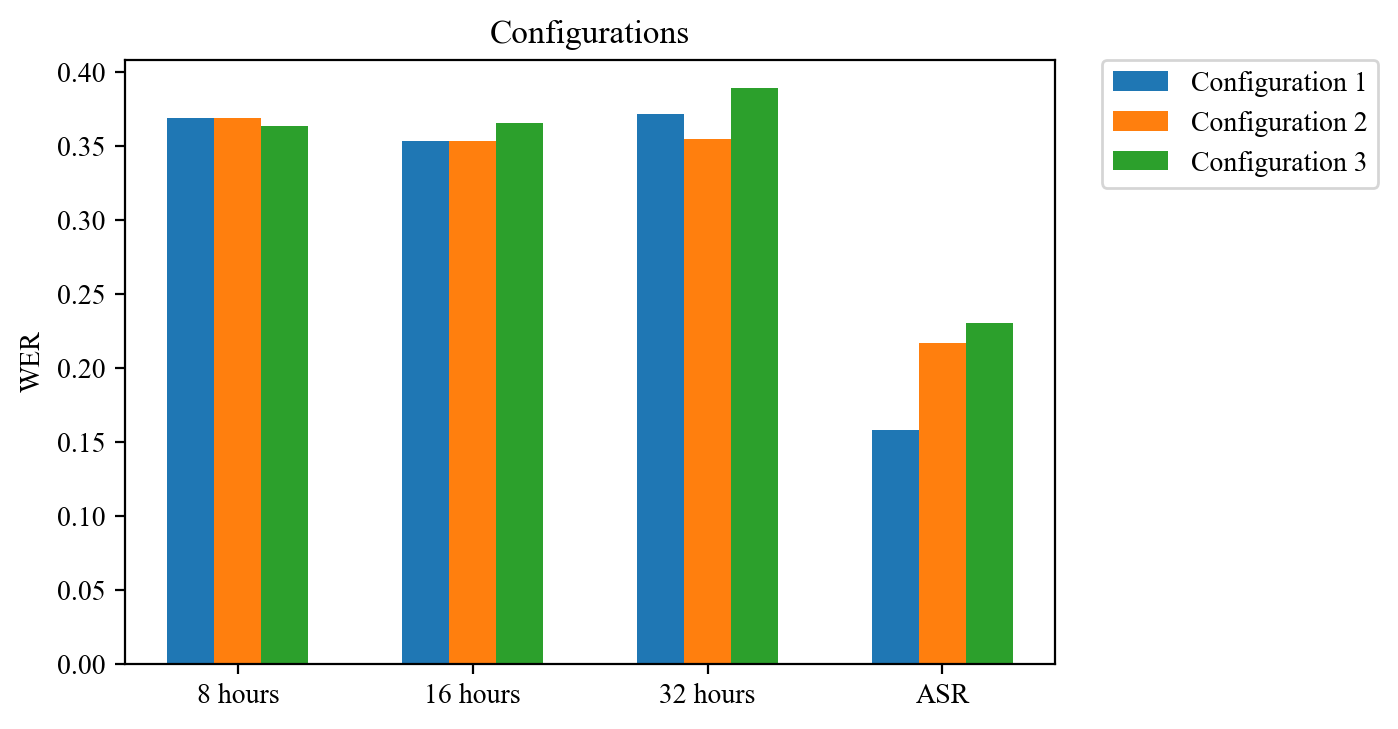

In [6]:
# old garbage
# data = {
#         'Configuration 1': [0.4205669671663695, 0.41747871716981055, 0.42561384172120553, 0.2874460738421658], #0:50:32.936000
#         'Configuration 2': [0.4056876739594236, 0.3949950689869304, 0.3860400177398728, 0.33927041341867675], #1:06:01.672000
#         'Configuration 3': [0.4128892392107573, 0.4067541928500564, 0.41824517531907135, 0.36049485629530365] #1:00:00.798000
#        }
data = {
        'Configuration 1': [0.36883534136546187, 0.35309236947791167, 0.37140562248995984, 0.1580722891566265],
        'Configuration 2': [0.36867819886438663, 0.35309652713587747, 0.35441700779083585, 0.21708701967516175],
        'Configuration 3': [0.36326302034720925, 0.3655030800821355, 0.3890237072988613, 0.2301661377636737]
        }
labels = ['8 hours', '16 hours', '32 hours', 'ASR']
colors = ['r', 'g', 'b']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()

for i, key in enumerate(data):
    offsets = x - width + (i*width)
    ax.bar(offsets, data[key], width, label=key)

ax.set_ylabel('WER')
ax.set_title('Configurations')
ax.set_xticks(x, labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

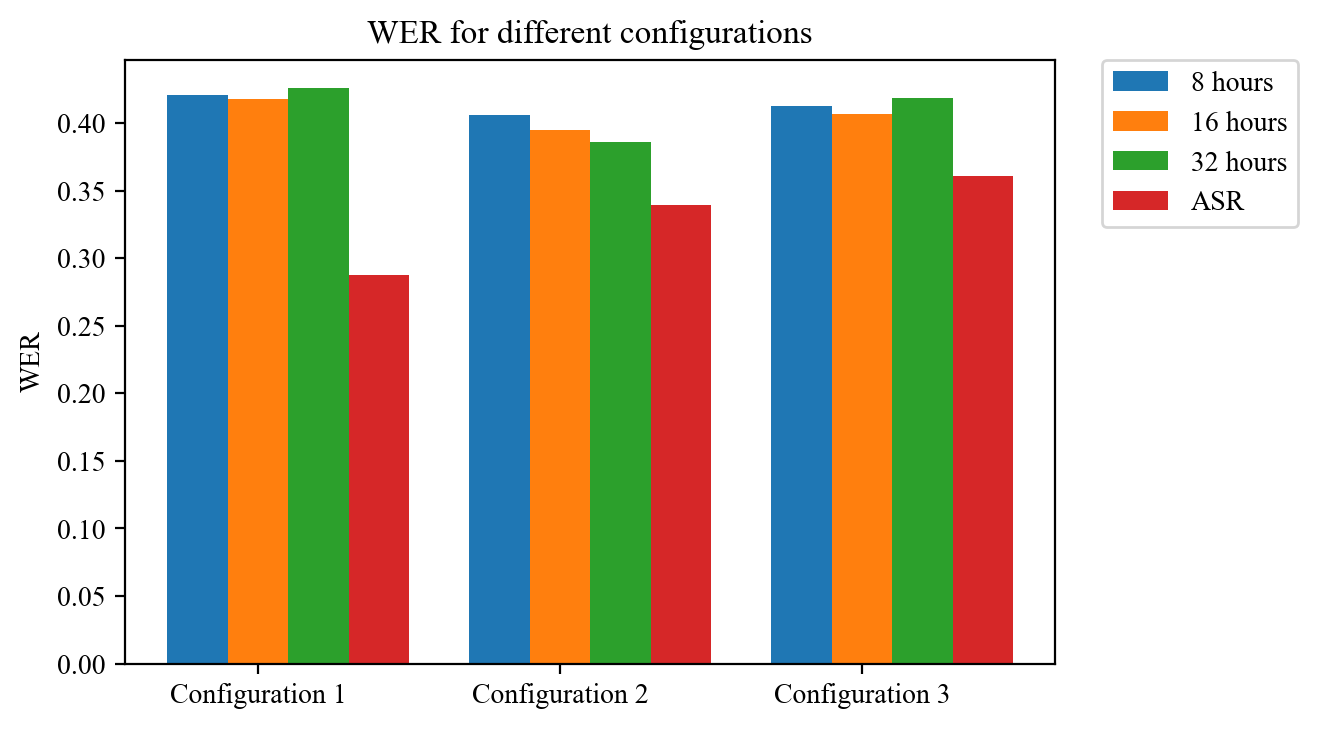

In [8]:
data = {
        '8 hours': [0.4205669671663695, 0.4056876739594236, 0.4128892392107573],
        '16 hours': [0.41747871716981055, 0.3949950689869304, 0.4067541928500564],
        '32 hours': [0.42561384172120553, 0.3860400177398728, 0.41824517531907135],
        'ASR': [0.2874460738421658, 0.33927041341867675, 0.36049485629530365]
       }
labels = ['Configuration 1', 'Configuration 2', 'Configuration 3']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()

for i, key in enumerate(data):
    offsets = x - width + (i*width)
    ax.bar(offsets, data[key], width, label=key)

ax.set_ylabel('WER')
ax.set_title('WER for different configurations')
ax.set_xticks(x, labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

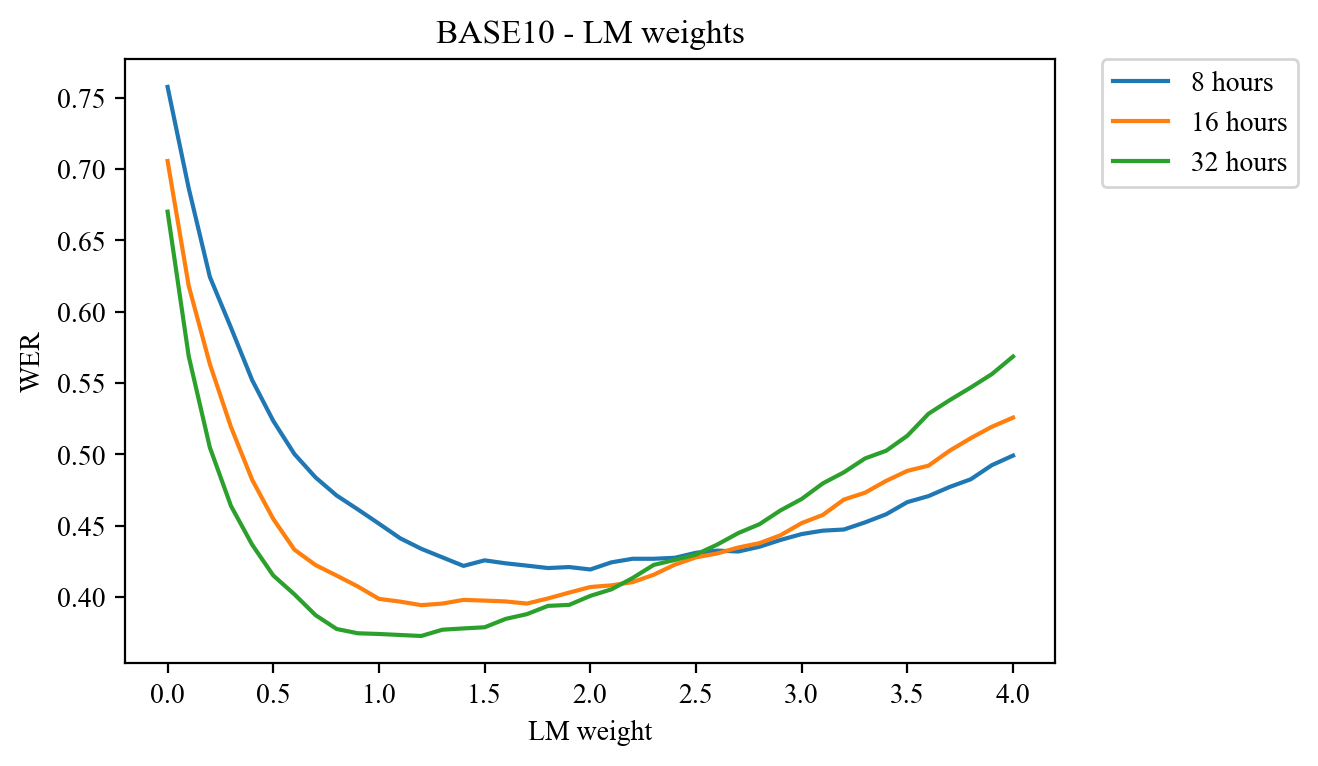

In [9]:
# Fine-tuning base10 - different LM weights - WER

# old garbage
# testset: 'test'
# data = {
#         '8 hours': [0.761000050797186, 0.437965417823946, 0.4056876739594236, 0.42867886608509326, 0.47918766069859703],
#         '16 hours': [0.7006993540139026, 0.39108805574562105, 0.3949950689869304, 0.4386549401847224, 0.5069587699190442],
#         '32 hours': [0.6611997912770066, 0.35983920737067104, 0.3860400177398728, 0.44999524443073224, 0.5491314196366458]
#        }
# testset: 'test'
data = {
        '8 hours': [0.7575272581774533, 0.6865059517855356, 0.6243873161948584, 0.588776632989897, 0.5520656196859057, 0.5234570371111333, 0.5002500750225067, 0.48384515354606383, 0.4711413424027208, 0.46143843152945885, 0.4514354306291888, 0.4412323697109133, 0.4338301490447134, 0.42782834850455137, 0.42182654796438934, 0.42572771831549466, 0.42362708812643796, 0.4220266079823947, 0.4203260978293488, 0.4210263078923677, 0.41932579773932177, 0.42432729818945686, 0.4268280484145244, 0.4268280484145244, 0.4275282584775433, 0.4310293087926378, 0.4325297589276783, 0.4319295788736621, 0.4352305691707512, 0.44003200960288086, 0.4441332399719916, 0.4465339601880564, 0.44733420026007803, 0.45233570071021306, 0.458037411223367, 0.4665399619885966, 0.47074122236671, 0.47714314294288285, 0.4825447634290287, 0.4924477343202961, 0.499149744923477],
        '16 hours': [0.7056116835050515, 0.6180854256276883, 0.5632689806942083, 0.5191557467240172, 0.4822446734020206, 0.45473642092627786, 0.4332299689906972, 0.42242672801840553, 0.41502450735220564, 0.4074222266680004, 0.39871961588476545, 0.3968190457137141, 0.3943182954886466, 0.3954186255876763, 0.3980194058217465, 0.397519255776733, 0.39691907572271684, 0.3954186255876763, 0.39901970591177355, 0.40312093628088425, 0.4070221066319896, 0.408222466740022, 0.4104231269380814, 0.4156246874062219, 0.4227268180454136, 0.42782834850455137, 0.43052915874762426, 0.43473041912573773, 0.4377313193958187, 0.44333299989997, 0.45183555066519954, 0.4575372611783535, 0.4683405021506452, 0.4731419425827748, 0.481444433329999, 0.48844653396018806, 0.4920476142842853, 0.5025507652295689, 0.5113534060218066, 0.5193558067420226, 0.5257577273181955],
        '32 hours': [0.6701010303090927, 0.5687706311893568, 0.504851455436631, 0.46383915174552365, 0.4367310193057917, 0.41512453736120836, 0.4019205761728519, 0.38731619485845753, 0.37761328398519556, 0.3746123837151145, 0.37411223367010105, 0.37341202360708214, 0.37271181354406324, 0.37711313394018203, 0.37801340402120637, 0.378813644093228, 0.3847154146243873, 0.38801640492147643, 0.3938181454436331, 0.394518355506652, 0.40082024607382216, 0.4054216264879464, 0.41332399719915974, 0.42252675802740824, 0.42602780834250276, 0.42982894868460536, 0.4367310193057917, 0.4448334500350105, 0.451035310593178, 0.46073822146643995, 0.468740622186656, 0.47964389316795036, 0.48744623387016106, 0.49714914474342303, 0.5025507652295689, 0.5130539161748524, 0.5284585375612684, 0.537961388416525, 0.5468640592177654, 0.5562668800640193, 0.5685705711713515]
       }

fig, ax = plt.subplots()
for key in data:
    ax.plot(np.arange(0, 4.1, step=0.1), data[key], label=key)
plt.title('BASE10 - LM weights')
plt.xlabel('LM weight')
plt.ylabel('WER')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

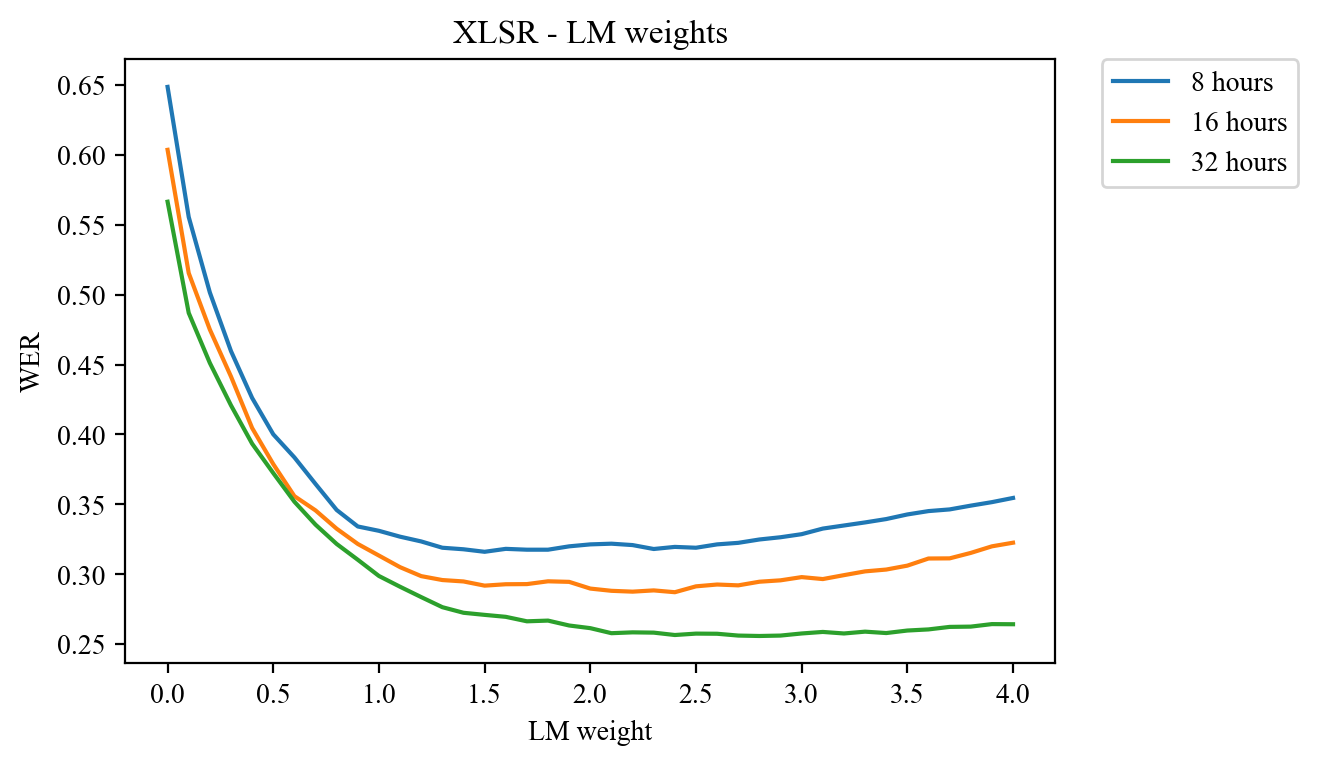

In [10]:
# Fine-tuning xlsr - different LM weights - WER

# old garbage
# testset: 'test'
# data = {
#         '8 hours': [0.6963392471112948, 0.37624344263104365, 0.3467389678870892, 0.33877298079706636, 0.3514536005340823],
#         '16 hours': [0.6645081139795997, 0.37090099214277134, 0.3299401487053767, 0.3226866753886695, 0.33754105735232176],
#         '32 hours': [0.6087193931924592, 0.3374441803407259, 0.2909081629766042, 0.2758174330712207, 0.2729826513891402]
#        }
# testset: 'test'
data = {
        '8 hours': [0.6485945783735121, 0.5555666700010004, 0.5015504651395418, 0.45963789136741023, 0.4261278383515055, 0.40012003601080326, 0.3836150845253576, 0.36460938281484445, 0.3460038011403421, 0.3342002600780234, 0.3310993297989397, 0.3268980694208262, 0.3234970491147344, 0.31899569870961286, 0.31789536861058315, 0.31609482844853454, 0.3181954586375913, 0.31759527858357506, 0.31759527858357506, 0.3199959987996399, 0.3213964189256777, 0.3218965689706912, 0.3208962688806642, 0.3180954286285886, 0.3195958787636291, 0.31899569870961286, 0.3213964189256777, 0.32249674902470743, 0.32489746924077223, 0.32649794938481547, 0.3286986095828749, 0.33269980994298287, 0.3349004701410423, 0.3371011303391017, 0.3395018505551666, 0.34280284085225565, 0.3452035610683205, 0.3464039211763529, 0.34910473141942583, 0.35160548164449335, 0.3546063819145744],
        '16 hours': [0.6035810743222967, 0.5154546363909173, 0.47504251275382614, 0.44143242972891866, 0.40462138641592477, 0.378813644093228, 0.3559067720316095, 0.345703711113334, 0.3325997799339802, 0.3216965089526858, 0.31339401820546164, 0.3050915274582375, 0.29868960688206464, 0.295888766629989, 0.294888466539962, 0.29188756626988094, 0.292887866359908, 0.29298789636891065, 0.2949884965489647, 0.2945883765129539, 0.28978693608082423, 0.28818645593678105, 0.2875862758827648, 0.28848654596378914, 0.287186155846754, 0.29138741622486747, 0.29268780634190256, 0.29208762628788637, 0.2946884065219566, 0.2956887066119836, 0.29798939681904574, 0.2965889766930079, 0.29938981694508354, 0.30209062718815644, 0.3033910173051916, 0.3061918575572672, 0.31129338801640494, 0.3113934180254076, 0.315294588376513, 0.3199959987996399, 0.3225967790337101],
        '32 hours': [0.5664699409822946, 0.48694608382514754, 0.45113534060218063, 0.4208262478743623, 0.3934180254076223, 0.3724117235170551, 0.35190557167150144, 0.33550065019505854, 0.3216965089526858, 0.3103931179353806, 0.2987896368910673, 0.2910873261978594, 0.2836851055316595, 0.27648294488346503, 0.272481744523357, 0.2709812943883165, 0.26958087426227867, 0.26637991397419225, 0.2668800640192058, 0.2633790137041112, 0.26147844353305993, 0.2578773632089627, 0.2584775432629789, 0.2582774832449735, 0.25657697309192756, 0.2575772731819546, 0.2574772431729519, 0.25617685305591675, 0.25587676302890866, 0.25617685305591675, 0.2576773031909573, 0.258777633289987, 0.2576773031909573, 0.2589776933079924, 0.25797739321796537, 0.259777933380014, 0.2605781734520356, 0.2623787136140842, 0.26257877363208965, 0.26437931379413826, 0.26427928378513554]
       }

fig, ax = plt.subplots()
for key in data:
    ax.plot(np.arange(0, 4.1, step=0.1), data[key], label=key)
plt.title('XLSR - LM weights')
plt.xlabel('LM weight')
plt.ylabel('WER')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

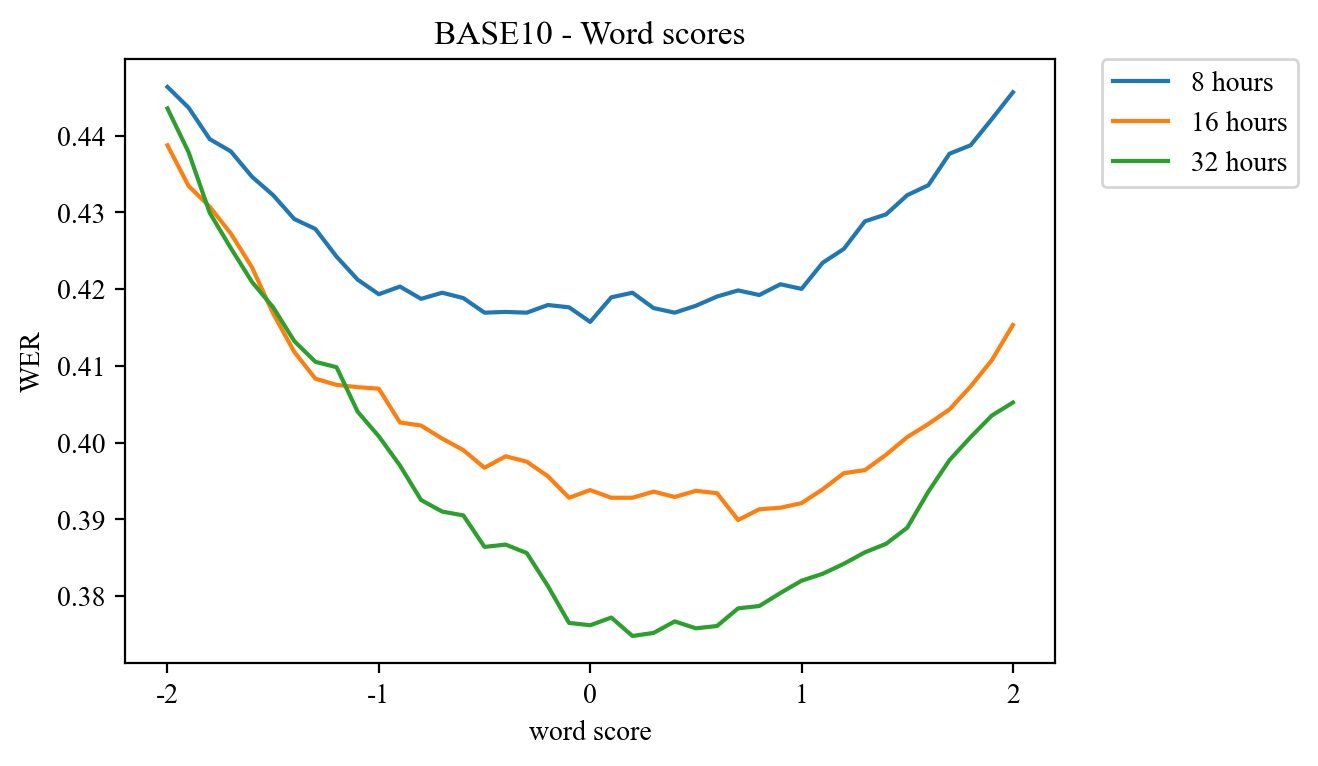

In [11]:
# Fine-tuning base10 - different word scores - WER

# old garbage
# testset: 'test'
# data = {
#         '8 hours': [0.4312308786641041, 0.4056876739594236, 0.4040174476371503, 0.41233950446411727, 0.4390619509242079],
#         '16 hours': [0.4241463660812583, 0.3949950689869304, 0.3817633490700113, 0.3853108197624748, 0.40831050499950594],
#         '32 hours': [0.42679490237207707, 0.3860400177398728, 0.36327317502963746, 0.37090529099844527, 0.39761084017397336]
#        } 
# testset: 'test'
data = {
        '8 hours': [0.44633390017005103, 0.4436330899269781, 0.43953185955786733, 0.43793137941382415, 0.434630389116735, 0.4322296689006702, 0.42912873862158646, 0.42782834850455137, 0.42422726818045414, 0.4212263679103731, 0.41932579773932177, 0.4203260978293488, 0.4187256176853056, 0.4195258577573272, 0.4188256476943083, 0.41692507752325697, 0.4170251075322597, 0.41692507752325697, 0.41792537761328397, 0.4176252875862759, 0.41572471741522454, 0.418925677703311, 0.4195258577573272, 0.41752525757727316, 0.41692507752325697, 0.4178253476042813, 0.4190257077123137, 0.4198259477843353, 0.4192257677303191, 0.4206261878563569, 0.42002600780234073, 0.4234270281084325, 0.42522756827048114, 0.42882864859457837, 0.4297289186756027, 0.4322296689006702, 0.4335300590177053, 0.43763128938681606, 0.43873161948584577, 0.44213263979193757, 0.44563369010703213],
        '16 hours': [0.43873161948584577, 0.4334300290087026, 0.4307292187656297, 0.4272281684505352, 0.42282684805441634, 0.41682504751425425, 0.4118235470641192, 0.4083224967490247, 0.4075222566770031, 0.407222166649995, 0.4070221066319896, 0.4026207862358708, 0.40222066619985997, 0.40052015604681407, 0.39901970591177355, 0.3967190157047114, 0.39821946583975193, 0.397519255776733, 0.3956186856056817, 0.3928178453536061, 0.3938181454436331, 0.3928178453536061, 0.3928178453536061, 0.3936180854256277, 0.3929178753626088, 0.39371811543463037, 0.3934180254076223, 0.38991697509252776, 0.39131739521856557, 0.39151745523657094, 0.3921176352905872, 0.3939181754526358, 0.3960188056416925, 0.3964189256777033, 0.3984195258577573, 0.40072021606481945, 0.40242072621786534, 0.4043212963889167, 0.4073221966589977, 0.4107232169650895, 0.4153245973792138],
        '32 hours': [0.44353305991797537, 0.43783134940482143, 0.4299289786936081, 0.42532759827948385, 0.420926277883365, 0.4176252875862759, 0.413223967190157, 0.41052315694708413, 0.40982294688406523, 0.4040212063619086, 0.40082024607382216, 0.3970191057317195, 0.392517755326598, 0.3910173051915575, 0.39051715514654395, 0.38641592477743325, 0.38671601480444134, 0.38561568470541163, 0.3813143943182955, 0.37651295388616585, 0.37621286385915775, 0.37721316394918475, 0.37481244373311995, 0.37521256376913076, 0.3767130139041713, 0.37581274382314694, 0.37611283385015504, 0.3784135240572172, 0.37871361408422527, 0.38041412423727117, 0.3820146043813144, 0.3829148744623387, 0.3842152645793738, 0.38571571471441435, 0.38681604481344406, 0.38891667500250077, 0.3936180854256277, 0.3977193157947384, 0.40072021606481945, 0.40352105631689505, 0.405221566469941]
       } 
fig, ax = plt.subplots()
for key in data:
    ax.plot(np.arange(0, 4.1, step=0.1), data[key], label=key)
plt.title('BASE10 - Word scores')
plt.xlabel('word score')
plt.ylabel('WER')
plt.xticks(list(range(5)), [-2, -1, 0, 1, 2])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

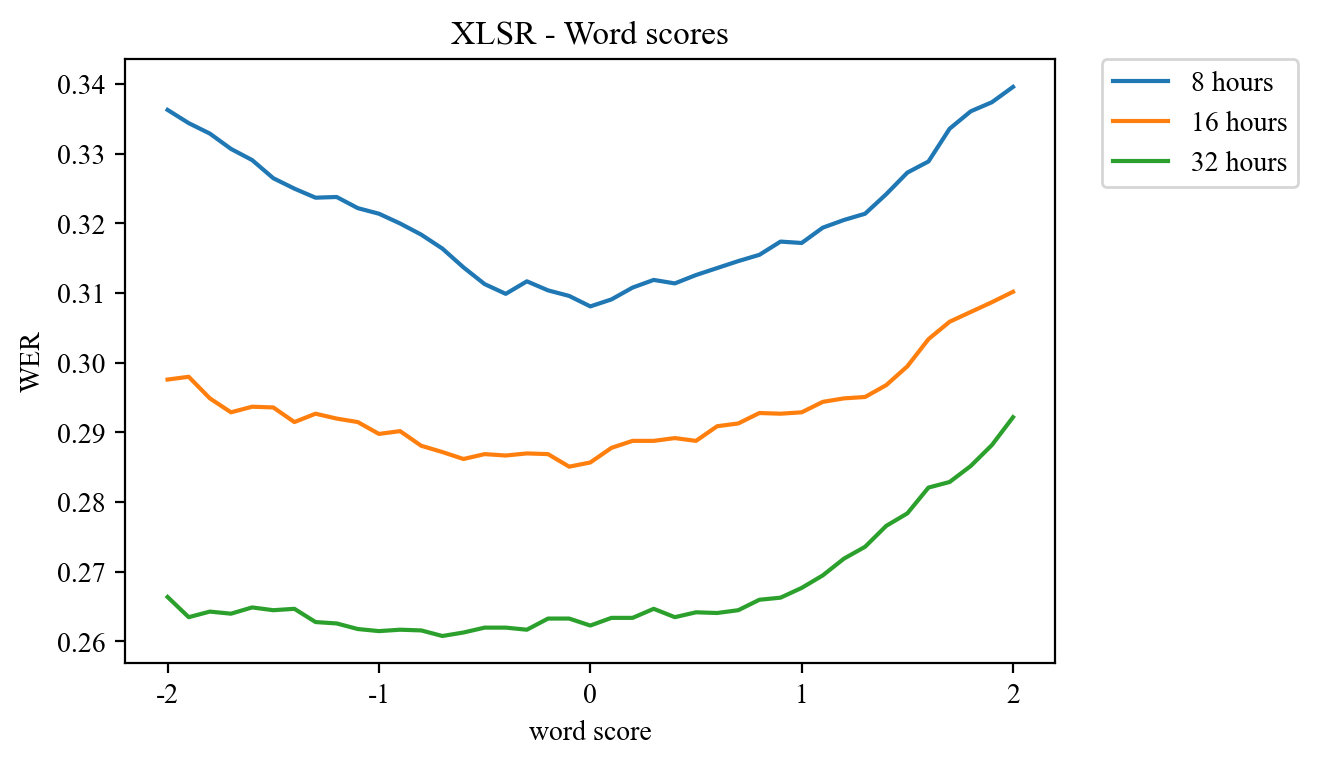

In [12]:
# Fine-tuning xlsr - different word scores - WER

# old garbage
# testset: 'test'
# data = {
#         '8 hours': [0.352854446488004, 0.3467389678870892, 0.3438462381980294, 0.3601868959505617, 0.39659838720409396],
#         '16 hours': [0.332518563361415, 0.3299401487053767, 0.33363667681442516, 0.3473113137938323, 0.3717126461653541],
#         '32 hours': [0.2918336312950643, 0.2909081629766042, 0.2955821695328123, 0.30419611652998246, 0.33342532042794876]
#        }
# testset: 'test'
data = {
        '8 hours': [0.3363008902670801, 0.3344003200960288, 0.3328998699609883, 0.3306992097629289, 0.32909872961888564, 0.32649794938481547, 0.32499749924977495, 0.3236971091327398, 0.3237971391417425, 0.32219665899769934, 0.3213964189256777, 0.3199959987996399, 0.3183955186555967, 0.3163949184755427, 0.31369410823246974, 0.31129338801640494, 0.30989296789036713, 0.31169350805241575, 0.3103931179353806, 0.309592877863359, 0.3080924277283185, 0.3090927278183455, 0.3107932379713914, 0.3118935680704211, 0.3113934180254076, 0.31259377813344, 0.313594078223467, 0.31459437831349407, 0.31549464839451835, 0.3173952185655697, 0.31719515854756425, 0.31939581874562367, 0.3204961488446534, 0.3213964189256777, 0.3241972591777533, 0.32729818945683703, 0.32889866960088027, 0.3336000800240072, 0.3361008302490747, 0.3374012203661098, 0.33960188056416923],
        '16 hours': [0.29758927678303493, 0.29798939681904574, 0.294888466539962, 0.292887866359908, 0.29368810643192955, 0.2935880764229269, 0.2914874462338702, 0.29268780634190256, 0.29198759627888365, 0.2914874462338702, 0.28978693608082423, 0.29018705611683504, 0.28808642592777833, 0.287186155846754, 0.286185855756727, 0.2868860658197459, 0.28668600580174053, 0.2869860958287486, 0.2868860658197459, 0.2850855256576973, 0.28568570571171353, 0.28778633590077024, 0.28878663599079724, 0.28878663599079724, 0.28918675602680805, 0.28878663599079724, 0.29088726617985394, 0.29128738621586475, 0.2927878363509053, 0.29268780634190256, 0.292887866359908, 0.2943883164949485, 0.294888466539962, 0.2950885265579674, 0.2967890367110133, 0.2994898469540862, 0.3033910173051916, 0.3058917675302591, 0.3072921876562969, 0.3086926077823347, 0.3101930579173752],
        '32 hours': [0.26637991397419225, 0.2634790437131139, 0.26427928378513554, 0.26397919375812745, 0.26487946383915173, 0.2644793438031409, 0.26467940382114635, 0.262778833650095, 0.26257877363208965, 0.261778533560068, 0.26147844353305993, 0.2616785035510653, 0.2615784735420626, 0.26077823347004103, 0.2612783835150545, 0.2619785935780734, 0.2619785935780734, 0.2616785035510653, 0.26327898369510855, 0.26327898369510855, 0.2622786836050815, 0.2633790137041112, 0.2633790137041112, 0.26467940382114635, 0.2634790437131139, 0.2641792537761328, 0.26407922376713017, 0.2644793438031409, 0.26597979393818144, 0.26627988396518953, 0.2676803040912274, 0.269480844253276, 0.2718815644693408, 0.2735820746223867, 0.27658297489246775, 0.27838351505451636, 0.2820846253876163, 0.28288486545963787, 0.2851855556667, 0.28818645593678105, 0.2921876562968891]
       }

fig, ax = plt.subplots()
for key in data:
    ax.plot(np.arange(0, 4.1, step=0.1), data[key], label=key)
plt.title('XLSR - Word scores')
plt.xlabel('word score')
plt.ylabel('WER')
plt.xticks(list(range(5)), [-2, -1, 0, 1, 2])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

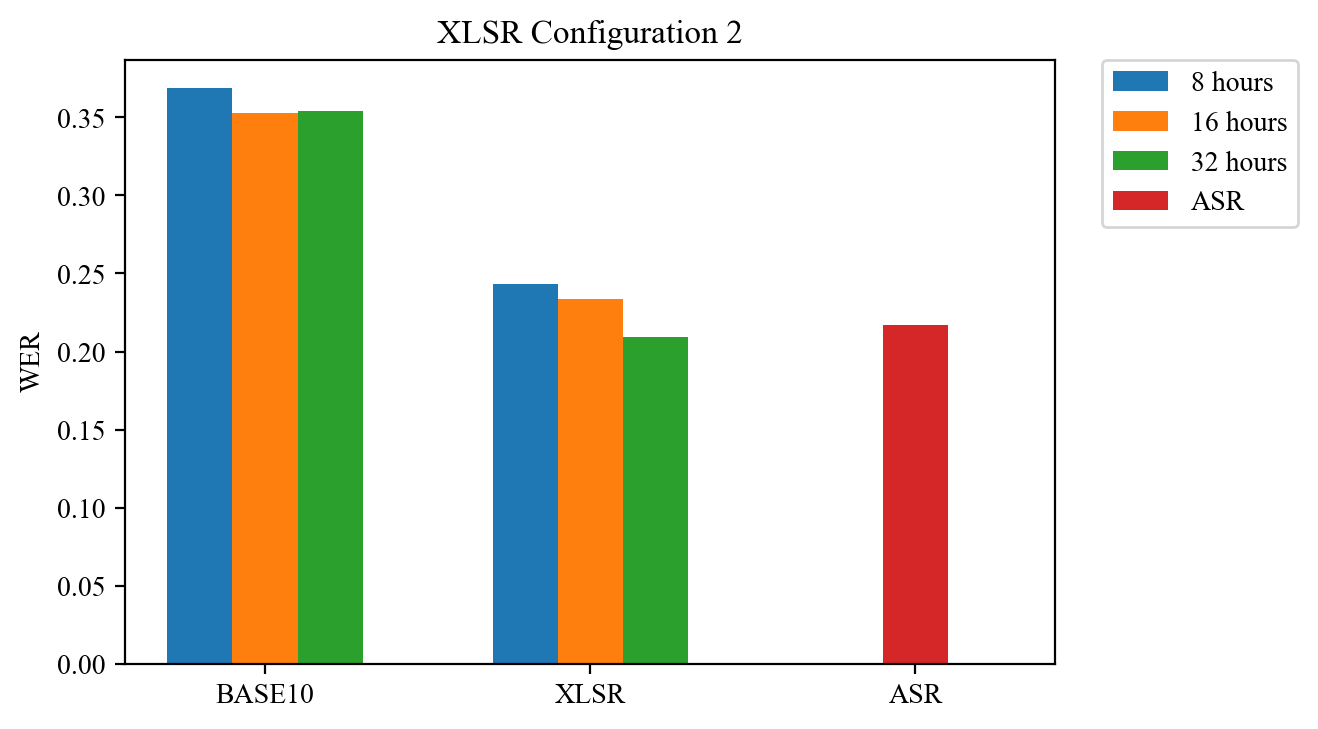

In [8]:
data = {
        '8 hours': [0.36867819886438663, 0.24310048857784233, 0], 
        '16 hours': [0.35309652713587747, 0.2338571239931335, 0], 
        '32 hours': [0.35441700779083585, 0.20956027994189885, 0]
       }
data_asr = {'ASR': [0.21708701967516175, 0, 0]}

labels = ['BASE10', 'XLSR', 'ASR']
colors = ['r', 'g', 'b']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()

for i, key in enumerate(data):
    offsets = x - width + (i*width)
    ax.bar(offsets, data[key], width, label=key)
    
# for i, key in enumerate(data_asr):
#     offsets = x - width + (i*width)
#     ax.bar(offsets, data_asr[key], width, label=key)

ax.bar([2, 0, 0], [0.21708701967516175, 0, 0], width, label='ASR')

ax.set_ylabel('WER')
ax.set_title('XLSR Configuration 2')
ax.set_xticks(x, labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

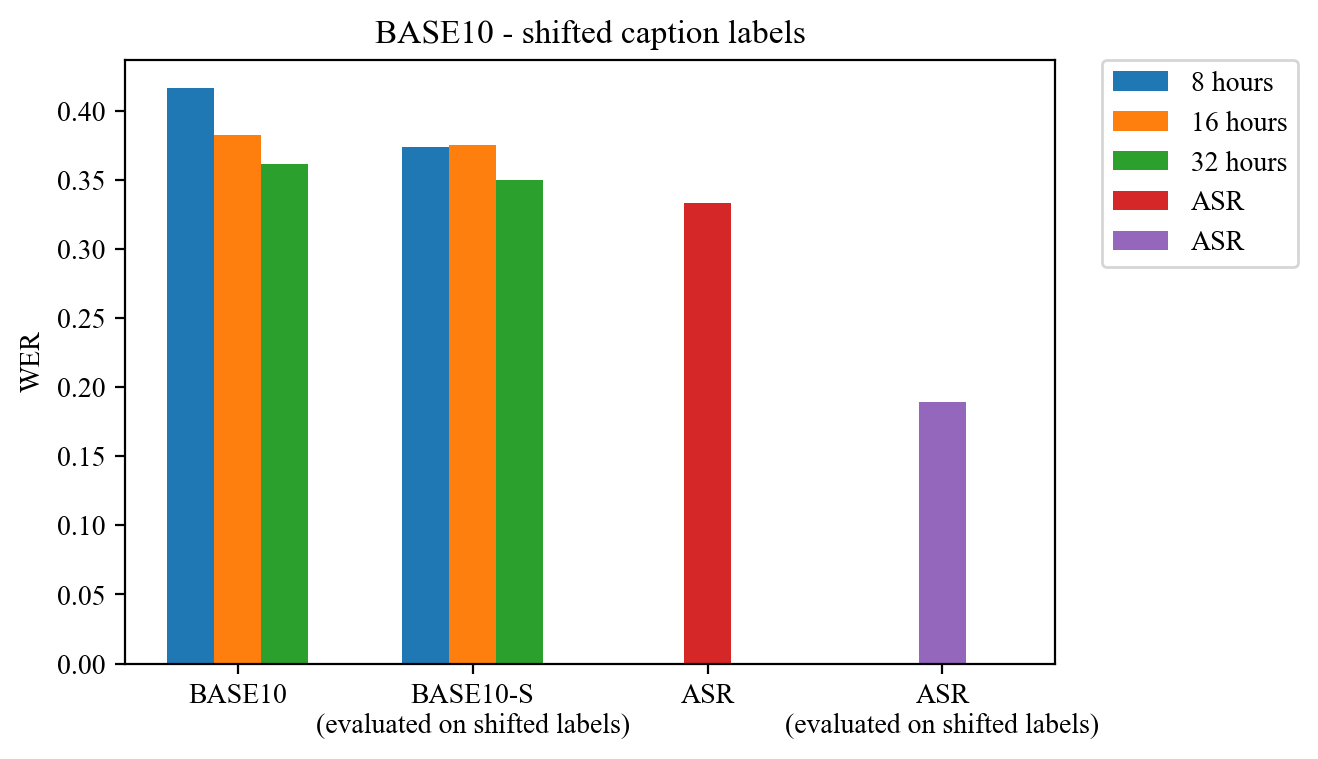

In [15]:
# old garbage
# c2tempdata
# data = {
#         '8 hours': [0.4056876739594236, 0.4168422158694568, 0], 
#         '16 hours': [0.3949950689869304, 0.4191991132131658, 0], 
#         '32 hours': [0.3860400177398728, 0.39814813124083154, 0]
#        }
# c2tempdata
data = {
        '8 hours': [0.41612483745123535, 0.3737164081275945, 0, 0], 
        '16 hours': [0.3821146343903171, 0.3753550360498143, 0, 0], 
        '32 hours': [0.3610083024907472, 0.34968319860170416, 0, 0]
       }

labels = ['BASE10', 'BASE10-S\n(evaluated on shifted labels)', 'ASR', 'ASR\n(evaluated on shifted labels)']
colors = ['r', 'g', 'b']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()

for i, key in enumerate(data):
    offsets = x - width + (i*width)
    ax.bar(offsets, data[key], width, label=key)
    
# for i, key in enumerate(data_asr):
#     offsets = x - width + (i*width)
#     ax.bar(offsets, data_asr[key], width, label=key)

ax.bar([2, 0, 0], [0.3334000200060018, 0, 0], width, label='ASR')
ax.bar([3, 0, 0], [0.18898842036268299, 0, 0], width, label='ASR')

ax.set_ylabel('WER')
ax.set_title('BASE10 - shifted caption labels')
ax.set_xticks(x, labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

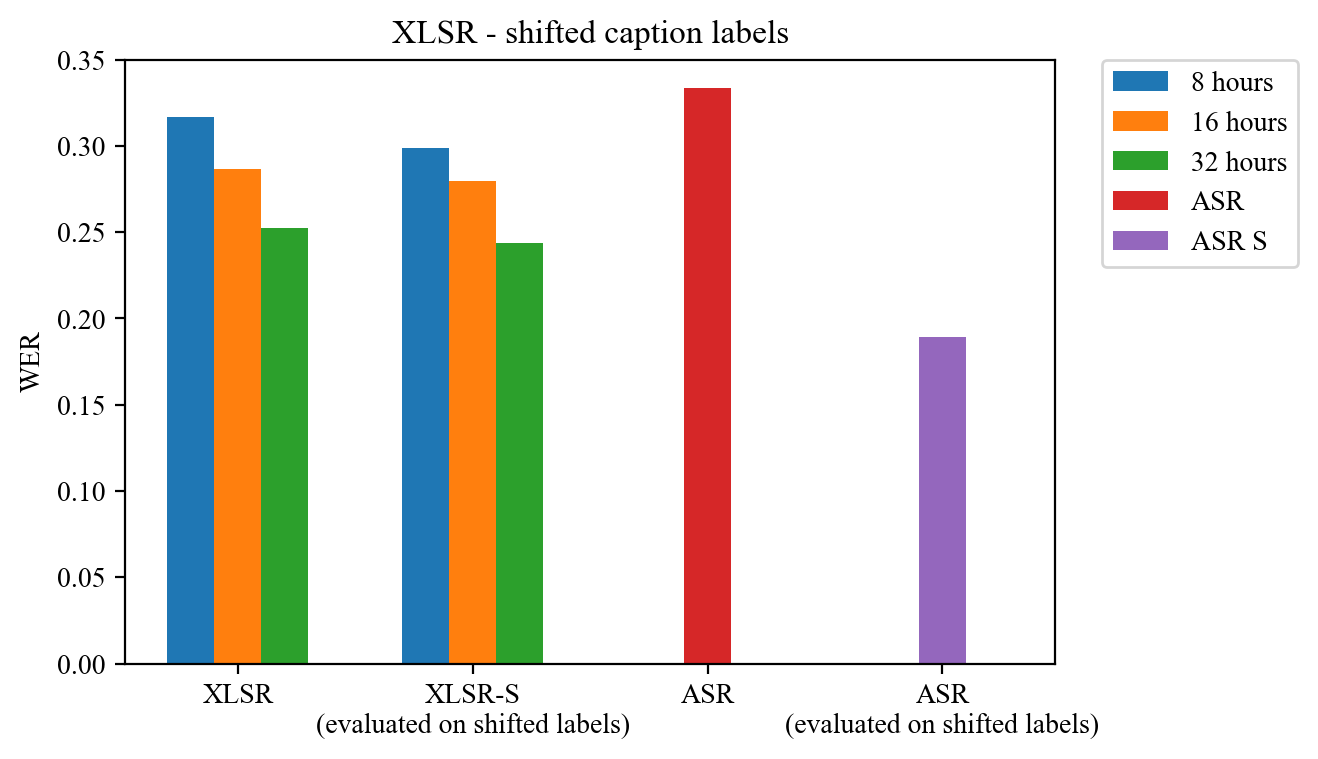

In [17]:
# c2tempdata
data = {
        '8 hours': [0.3166950085025508, 0.2989949748743719, 0, 0], 
        '16 hours': [0.28678603581074325, 0.27954992353069696, 0, 0], 
        '32 hours': [0.25237571271381415, 0.2436093511033428, 0, 0]
       }

labels = ['XLSR', 'XLSR-S\n(evaluated on shifted labels)', 'ASR', 'ASR\n(evaluated on shifted labels)']
colors = ['r', 'g', 'b']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()

for i, key in enumerate(data):
    offsets = x - width + (i*width)
    ax.bar(offsets, data[key], width, label=key)
    
# for i, key in enumerate(data_asr):
#     offsets = x - width + (i*width)
#     ax.bar(offsets, data_asr[key], width, label=key)

ax.bar([2, 0, 0, 0], [0.3334000200060018, 0, 0, 0], width, label='ASR')
ax.bar([3, 0, 0, 0], [0.18898842036268299, 0, 0, 0], width, label='ASR S')

ax.set_ylabel('WER')
ax.set_title('XLSR - shifted caption labels')
ax.set_xticks(x, labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

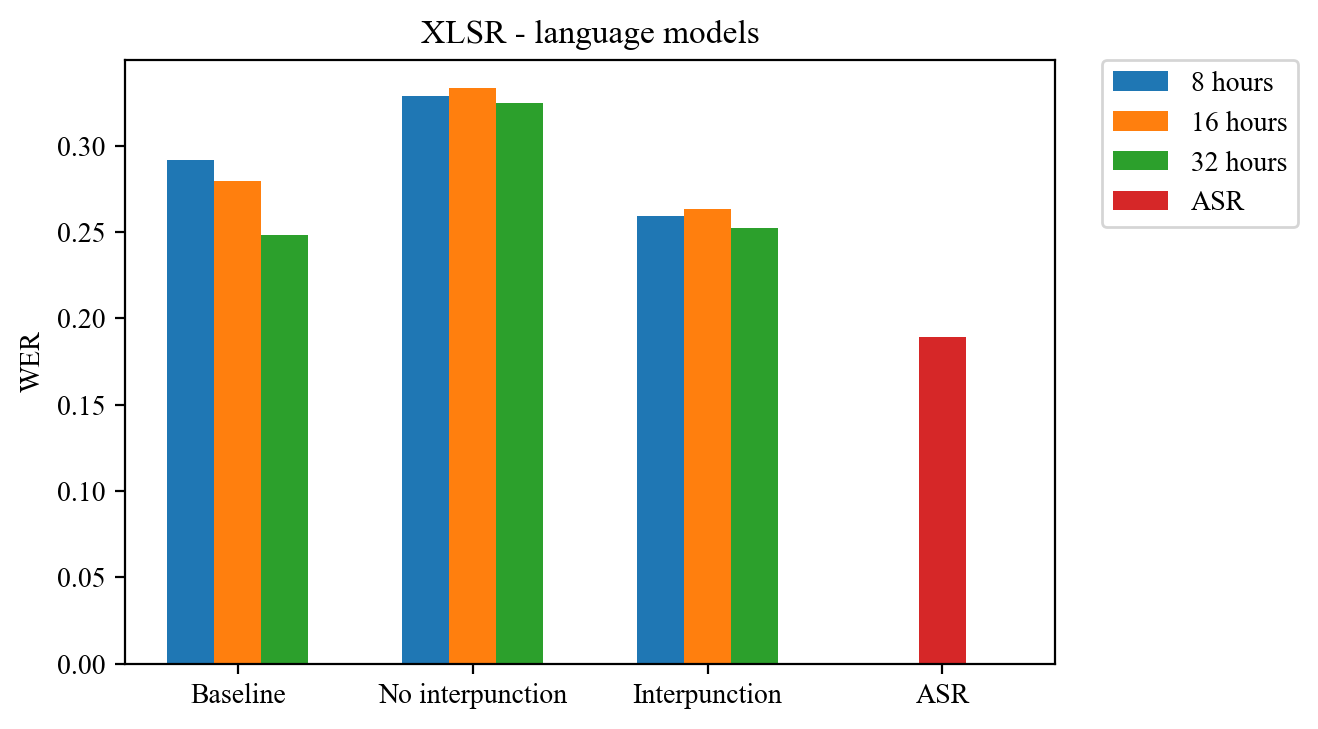

In [18]:
# ctc2tempdata
data = {
        '8 hours': [0.2917850120166048, 0.3288194823632194, 0.2591460085180736, 0], 
        '16 hours': [0.27933143980773434, 0.3332969313093808, 0.26351425139237744, 0], 
        '32 hours': [0.24819750928555823, 0.32499726984820354, 0.2523752320629027, 0]
       }

labels = ['Baseline', 'No interpunction', 'Interpunction','ASR']
colors = ['r', 'g', 'b']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()

for i, key in enumerate(data):
    offsets = x - width + (i*width)
    ax.bar(offsets, data[key], width, label=key)
    
ax.bar([3, 0, 0, 0], [0.18898842036268299, 0, 0, 0], width, label='ASR')

ax.set_ylabel('WER')
ax.set_title('XLSR - language models')
ax.set_xticks(x, labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()